# Summary

The blog explains Long Short-Term Memory (LSTM) networks, a special kind of recurrent neural network (RNN) that is capable opf learning long-term dependencies. 

* Recurrent Neural Networks (RNNs): RNNs are designed to handle sequences of data by using loops to allow information to persist. Unlike traditional neural networks, they have a sense of memory and are able to connect previous information to the present task. RNNs can be thought of as multiple copies of the same network, each passing a message to a successor.
* The Problem of Long-Term Dependencies: While RNNs are theoretically capable of connecting previous information to the present task, in practice, they struggle with long-term dependencies, where the relevant information is far in the past.
* LSTM Networks. LSTMs are explicitly designed to avoid the long-term dependency problem. They are a special kind of RNN that work much better than standard RNNs for most tasks.
* Structure of LSTMs: LSTMs have a chain-like structure where each repeating module contains four interacting layers. The key component of an LSTM is the cell state which acts like a conveyor belt, allowing information to flow along it unchanged.
* Gates: LSTMs use gates to protect and control the cell states. These gates are composed of a sigmoid neural net layer and a pointwise multiplication operation, and determine how much information should be let trhoug. There are three gates in an LSTM:
  1. Forget Gate: Decides what information to throw away from the cell state.
  2. Input Gate: Decides what new information to store in the cell state.
  3. Output Gate: Decides what parts of the cell state to output.
* Variants on LSTMs: The post discusses some of the variations on the standard LSTM, such as peephole connections, coupled forget and input gates, and Gated Recurrent Units (GRUs). It also mentions other approaches to tackling long-term dependencies, like Clockwork RNNs.

# Step-by-Step LSTM Walk Through

The **first step** in our LSTM is to decide what information we're going to throw away from the cell state. This decision is made by a sigmoid layer called the "forget gate layer". It looks at $h_{t-1}$ and $x_t$, and outputs a number between 0 and 1 for each number in the cell state $C_{t-1}$. A 1 represents "completely keep this" while a 0 represents "completely get rid of this".

Go back to the example of a language model trying to predict the next word based on all the previous ones. In such a problem, the cell state might include the gender of the present subject, so that the correct pronouns can be used. When we see a new subject, we want to forget the gender of the old subject. 

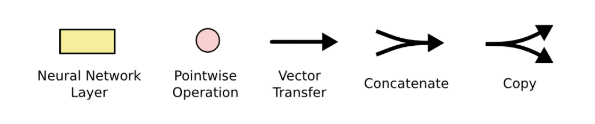
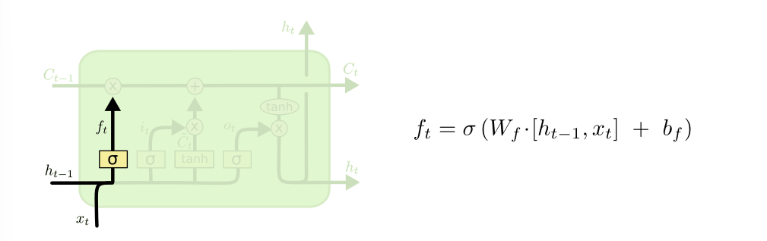

The **next step** is to decide what new information we're going to store in the cell state. This has two parts. First, a sigmoid layer called the "input gate layer" decides which values we'll update. Next, a tanh layer creates a vector of new candidate values, $\tilde{C_{t}}$, what could be added to the state. In the next step, we'll combine these two to create an update to the state. 

In the example of language model, we'd want to add the gender of the new subject to the cell state, to replace the old one we're forgetting. 
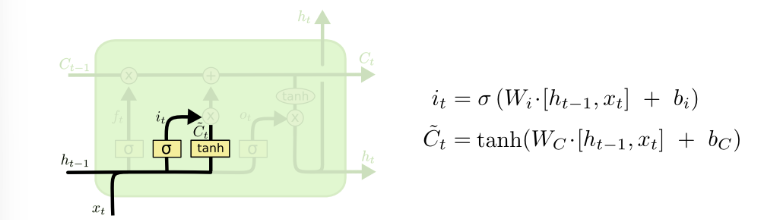

It's now time to update the old cell state, $C_{t-1}$, into the new cell state $C_t$. The previous steps already decided what to do, we just need to actually do it. 

We multiply the old state by $f_t$, forgetting the things we decided to forget earlier. Then, we add $i_{t}* \tilde{C_{t}}$. This is the new candidate values, scaled by how much we decided to update each state value. 

In the case of the langauge model, this is where we'd actually drop the information about the old subject's gender and add the new information, as we decided in the previous steps. 
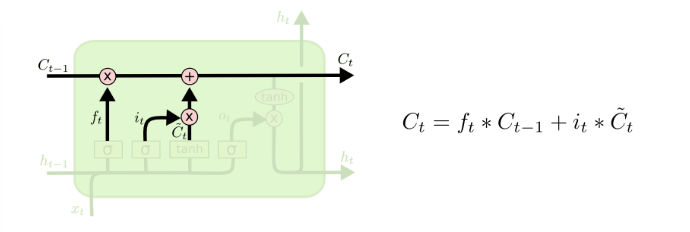

**Finally**, we need to decide what we're going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we're going to output. Then, we put the cell state through tanh (to push the values to be between -1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

For the langauge model example, since it just saw a subject, it might want to output information relevant to a verb, in case that's what is coming next. For example, it might output whether the subject is singular or plural, so that we know what form a verb should be conjugated into if that's what follows next. 

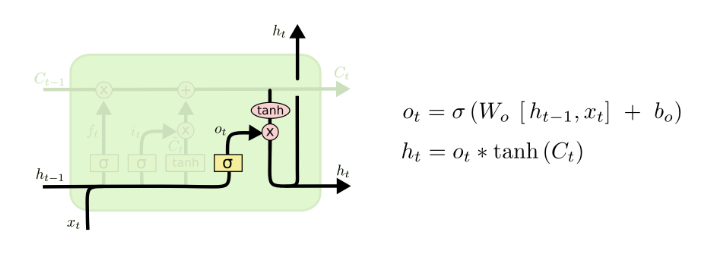